In [94]:
# main libraries
import pandas as pd
import numpy as np

# visual libraries
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report
# from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [64]:
# df=pd.read_csv('ratio_dataset.csv')
df=pd.read_csv('dataset.csv')
# first 5 values of the dataset
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [65]:
df.shape

(3867, 11)

In [66]:
All = df.shape[0]
fraud = df[df['isFraud'] == 1]
nonFraud = df[df['isFraud'] == 0]

x = len(fraud)/All
y = len(nonFraud)/All

print('frauds :',x*100,'%')
print('non frauds :',y*100,'%')

frauds : 0.6206361520558572 %
non frauds : 99.37936384794415 %


C:\Users\srini\AppData\Local\Temp\ipykernel_1304\1308195016.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  classes = pd.value_counts(df['isFraud'], sort = True)


Text(0, 0.5, 'Frequency')

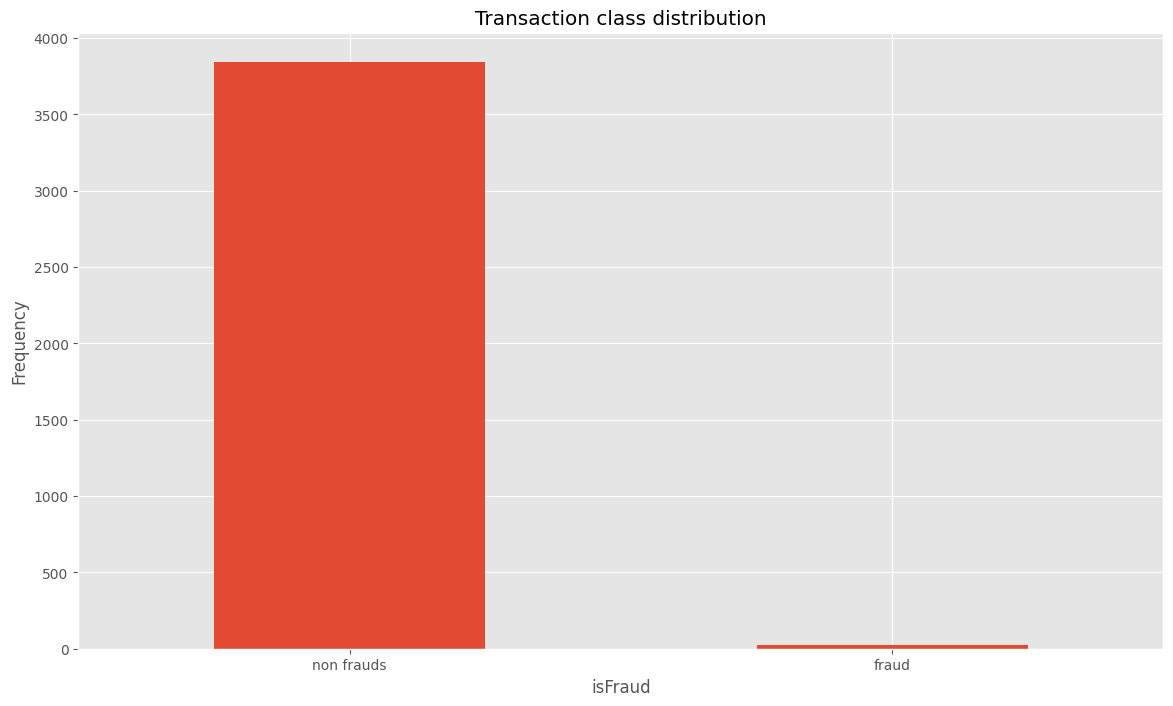

In [67]:
# Transaction against the Frequency plot
labels = ['non frauds','fraud']
classes = pd.value_counts(df['isFraud'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("isFraud")
plt.ylabel("Frequency")

In [68]:
df['type']=df['type'].map({'PAYMENT':2, 'TRANSFER':4, 'CASH_OUT':1, 'DEBIT':5, 'CASH_IN':3})

In [69]:
df = df.drop(columns=['step','nameOrig', 'nameDest', 'isFlaggedFraud'])

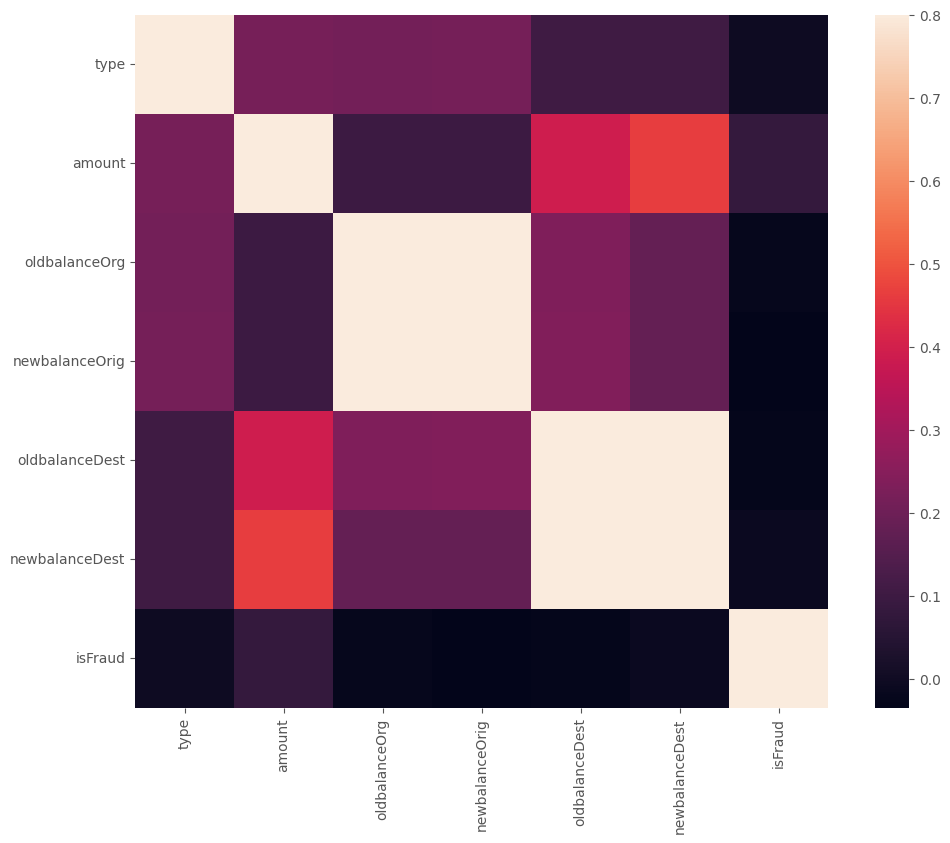

In [70]:
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [71]:
# Standardizing the features
df['type'] = StandardScaler().fit_transform(df['type'].values.reshape(-1,1))
df['amount'] = StandardScaler().fit_transform(df['amount'].values.reshape(-1,1))
df['oldbalanceOrg'] = StandardScaler().fit_transform(df['oldbalanceOrg'].values.reshape(-1,1))
df['newbalanceOrig'] = StandardScaler().fit_transform(df['newbalanceOrig'].values.reshape(-1,1))
df['oldbalanceDest'] = StandardScaler().fit_transform(df['oldbalanceDest'].values.reshape(-1,1))
df['newbalanceDest'] = StandardScaler().fit_transform(df['newbalanceDest'].values.reshape(-1,1))

df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,-0.423663,-0.388207,-0.365907,-0.372408,-0.344454,-0.347408,0
1,-0.423663,-0.423219,-0.434089,-0.435564,-0.344454,-0.347408,0
2,1.533692,-0.430609,-0.443737,-0.444252,-0.344454,-0.347408,1
3,-1.402341,-0.430609,-0.443737,-0.444252,-0.335292,-0.347408,1
4,-0.423663,-0.380180,-0.424791,-0.430857,-0.344454,-0.347408,0


In [72]:
# PCA - used to reduce size of feature space

X = df[['type','amount','oldbalanceOrg','newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y = df['isFraud']

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X.values)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [73]:
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,principal component 1,principal component 2,isFraud
0,-0.876665,0.029731,0
1,-0.946224,0.087598,0
2,-0.525206,-0.112746,1
3,-1.168139,0.202092,1
4,-0.925824,0.094324,0


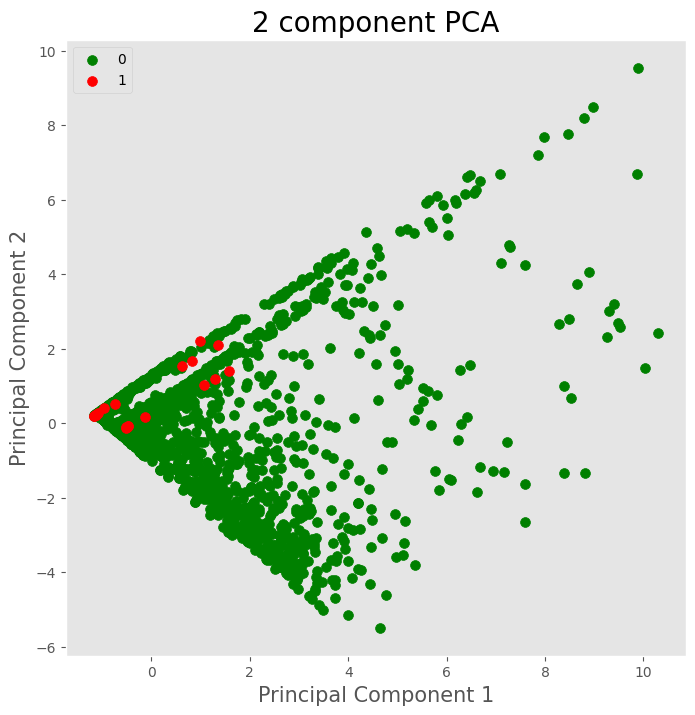

In [74]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['isFraud'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

In [75]:
df = df.sample(frac=1)

frauds = df[df['isFraud'] == 1]
non_frauds = df[df['isFraud'] == 0]

new_df = pd.concat([non_frauds, frauds])
# Shuffle dataframe rows
new_df = new_df.sample(frac=1, random_state=42)

new_df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2261,0.555014,0.282377,1.234198,1.270907,-0.232816,-0.313286,0
2043,-0.423663,-0.428871,-0.421141,-0.422314,-0.344454,-0.347408,0
1719,0.555014,3.253151,1.743488,2.072649,0.686413,0.157233,0
227,2.512369,-0.411658,-0.394642,-0.398137,-0.336213,-0.345473,0
916,-0.423663,-0.427912,-0.439076,-0.439965,-0.344454,-0.347408,0


In [76]:
features = new_df.drop(['isFraud'], axis = 1)
labels = pd.DataFrame(new_df['isFraud'])

feature_array = features.values
label_array = labels.values

In [77]:
label_array

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [78]:
# splitting the faeture array and label array keeping 80% for the trainnig sets
X_train,X_test,y_train,y_test = train_test_split(feature_array,label_array,test_size=0.20)

# normalize: Scale input vectors individually to unit norm (vector length).
X_train = normalize(X_train)
X_test=normalize(X_test)

<h3>Model Building</h3>

In [79]:
neighbours = np.arange(1,5)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

for i,k in enumerate(neighbours):
    #Setup a knn classifier with k neighbors
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
    
    #Fit the model
    knn.fit(X_train,y_train.ravel())
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train.ravel())
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test.ravel()) 

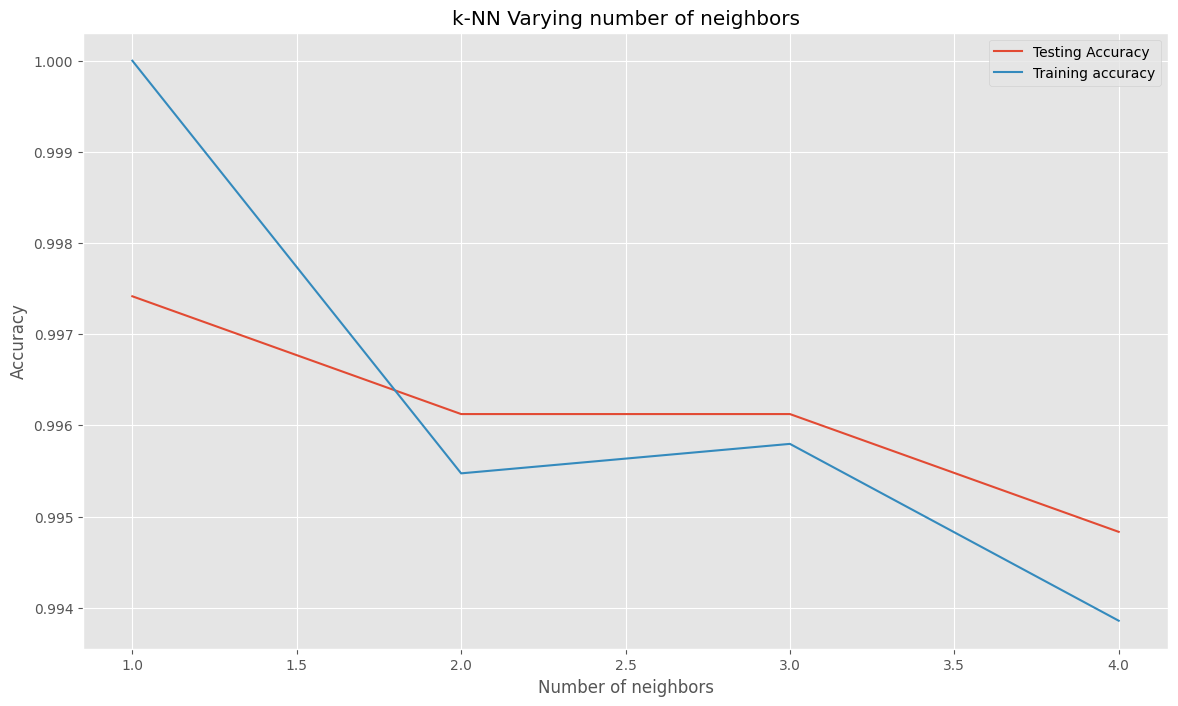

In [80]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [81]:
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]

In [82]:
#k_nearest_neighbours_classification
knn=KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train,y_train.ravel())

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=1)

In [83]:
# predicting labels for testing set
knn_predicted_test_labels=knn.predict(X_test)

In [85]:
# knn_predicted_test_labels=knn.predict(4,181,181,0,0,0)

Text(0.5, 1.0, ' Number of Blobs')

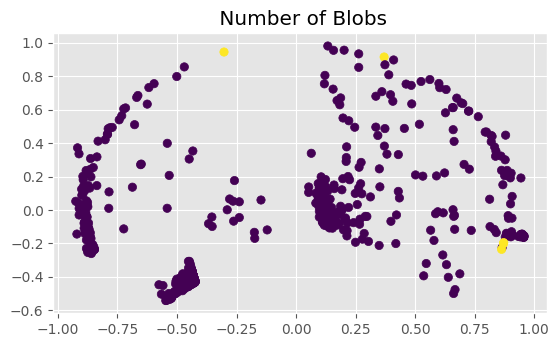

In [86]:
from pylab import rcParams
#plt.figure(figsize=(12, 12))
rcParams['figure.figsize'] = 14, 8
plt.subplot(222)
plt.scatter(X_test[:, 0], X_test[:, 1], c=knn_predicted_test_labels)
plt.title(" Number of Blobs")

In [87]:
#scoring knn
knn_accuracy_score  = accuracy_score(y_test,knn_predicted_test_labels)
knn_precision_score  = precision_score(y_test,knn_predicted_test_labels)
knn_recall_score    = recall_score(y_test,knn_predicted_test_labels)
knn_f1_score        = f1_score(y_test,knn_predicted_test_labels)
knn_MCC             = matthews_corrcoef(y_test,knn_predicted_test_labels)

In [88]:
print("")
print("K-Nearest Neighbours")
print("Scores")
print("Accuracy -->",knn_accuracy_score*100)
print("Precision -->",knn_precision_score)
print("Recall -->",knn_recall_score)
print("F1 -->",knn_f1_score)
print("MCC -->",knn_MCC)
print(classification_report(y_test,knn_predicted_test_labels))


K-Nearest Neighbours
Scores
Accuracy --> 99.74160206718346
Precison --> 0.8
Recall --> 0.8
F1 --> 0.8
MCC --> 0.7986996098829648
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       769
           1       0.80      0.80      0.80         5

    accuracy                           1.00       774
   macro avg       0.90      0.90      0.90       774
weighted avg       1.00      1.00      1.00       774



Text(0.5, 1.0, 'Accuracy Score: 99.74160206718346')

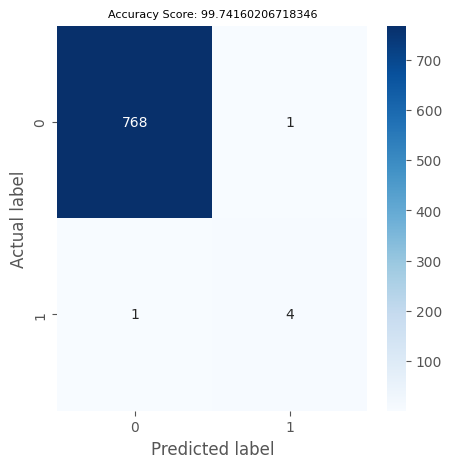

In [89]:
plt.figure(figsize=(5,5))
sns.heatmap(data=confusion_matrix(y_test, knn_predicted_test_labels),fmt='.0f',annot= True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
accuracy = accuracy_score(y_test, knn_predicted_test_labels)
all_sample_title = 'Accuracy Score: {0}'.format(accuracy*100)
plt.title(all_sample_title, size = 8)

In [156]:
# new_data = {
#     'type': 4,  # This should be a number representing the transaction type
#     'amount': 181,  # The amount of the transaction
#     'oldbalanceOrg': 181,  # The original balance before the transaction
#     'newbalanceOrig': 0,  # The new balance after the transaction
#     'oldbalanceDest': 21182,  # The original balance of the recipient before the transaction
#     'newbalanceDest': 0  # The new balance of the recipient after the transaction
# }

# # Convert the dictionary to a dataframe
# new_data_df = pd.DataFrame([new_data])
# # new_data_df = pd.DataFrame([[4,181,181,0,0,0]])

# # Standardize the features just like you did while training
# scaler = StandardScaler()
# # new_data_df = scaler.fit_transform(new_data_df)
# # new_data_df = scaler.fit_transform(new_data_df)

# # Reduce the dimensionality to two principal components
# pca_input = PCA(n_components=1)
# # new_data_pca = pca_input.fit_transform(new_data_df)
# new_data_pca = pca_input.fit_transform(new_data_df)

# # Now you can predict using your KNN model
# prediction = knn.predict(new_data_df)
# prediction[0]


c:\Users\srini\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_pca.py:557: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
c:\Users\srini\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0

In [151]:
# new_data_df[0][0]
# new_data_pca
# prediction[0]

0